In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import pandas_profiling 
from pandas_profiling import ProfileReport  
from sklearn.feature_selection import SelectFromModel
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from operator import itemgetter, attrgetter

### Load Data

In [65]:
data = pd.read_csv('Train.csv') 

X_train = data.iloc[:,0:9]
y_train = data.iloc[:,-1]

data = pd.read_csv('Test.csv') 

X_valid = data

### EDA and Data Standardization and Scaling

In [66]:
#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = pd.DataFrame(X_train)
dv = pd.DataFrame(X_valid)

train_objs_num = len(df)
dataset = pd.concat(objs=[df, dv], axis=0)

# Factorize the values 
labels,levels = pd.factorize(dataset['MonthOfMatch'])
# Save the encoded variables in `iris.Class`
dataset['MonthOfMatch'] = labels
print(levels)

# Factorize the values 
labels,levels = pd.factorize(dataset['Team1_Venue'])
# Save the encoded variables in `iris.Class`
dataset['Team1_Venue'] = labels
print(levels)

# Factorize the values 
labels,levels = pd.factorize(dataset['Team2_Venue'])
# Save the encoded variables in `iris.Class`
dataset['Team2_Venue'] = labels
print(levels)

# Factorize the values 
labels,levels = pd.factorize(dataset['Team1_Innings'])
# Save the encoded variables in `iris.Class`
dataset['Team1_Innings'] = labels
print(levels)

# Factorize the values 
labels,levels = pd.factorize(dataset['Team2_Innings'])
# Save the encoded variables in `iris.Class`
dataset['Team2_Innings'] = labels
print(levels)

#dataset = dataset.apply(lambda x: pd.factorize(x)[0])

X_train = (dataset[:train_objs_num])
X_valid = (dataset[train_objs_num:])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)


#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = pd.DataFrame(X_train)
dv = pd.DataFrame(X_valid)

#Checking if there are any Nulls/NaNs in the dataset
print('\nCount of Number of NaN in the Training Dataset : {}'.format(df.isna().sum().sum()))
print('Count of Number of Nulls in the Training Dataset : {}'.format(df.isnull().sum().sum()))

#Checking if there are any Nulls/NaNs in the dataset
print('\nCount of Number of NaN in the Training Dataset : {}'.format(dv.isna().sum().sum()))
print('Count of Number of Nulls in the Training Dataset : {}'.format(dv.isnull().sum().sum()))

Index(['Dec', 'Sep', 'Feb', 'Aug', 'Nov', 'May', 'Jan', 'Jun', 'Apr', 'Oct',
       'Mar', 'Jul'],
      dtype='object')
Index(['Home', 'Neutral', 'Away'], dtype='object')
Index(['Away', 'Neutral', 'Home'], dtype='object')
Index(['Second', 'First'], dtype='object')
Index(['First', 'Second'], dtype='object')

Count of Number of NaN in the Training Dataset : 0
Count of Number of Nulls in the Training Dataset : 0

Count of Number of NaN in the Training Dataset : 0
Count of Number of Nulls in the Training Dataset : 0


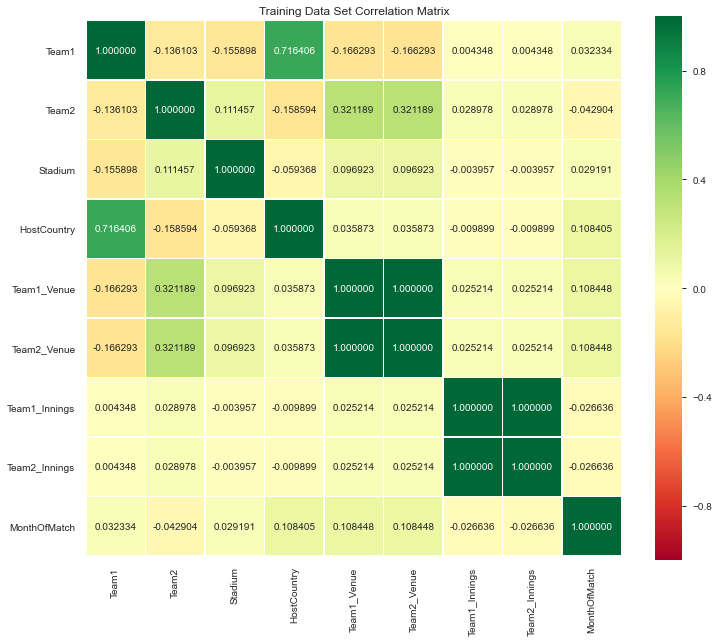

In [5]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = df.corr()

plt.figure(figsize = (12,10))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    xticklabels=data.columns,
    yticklabels=data.columns,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    square=True,
    linewidths=.5, annot=True, fmt="f"
)
plt.title('Training Data Set Correlation Matrix')
#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')
plt.show()

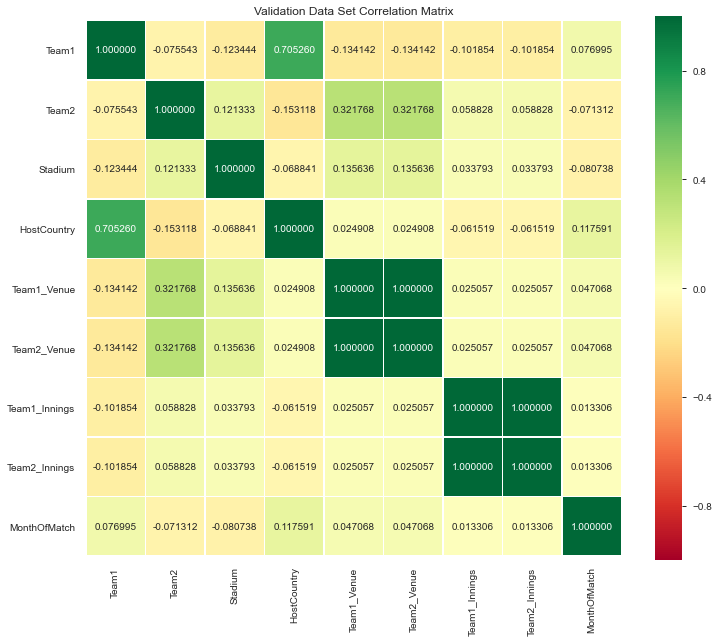

In [6]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = dv.corr()

plt.figure(figsize = (12,10))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    xticklabels=data.columns,
    yticklabels=data.columns,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    square=True,
    linewidths=.5, annot=True, fmt="f"
)
plt.title('Validation Data Set Correlation Matrix')
#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')
plt.show()

In [81]:
# Specifiying the range of Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
#n_estimators = [10]

# Specifying the range of Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]
max_depth.append(None)

# Specifying the range of Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]

# Specifying the range of Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Specifying the Method of selecting samples for training each tree
bootstrap = [True, False]
#bootstrap = [True]

# Specifying the Class weight
class_weight = ['balanced']

# Now, we create the random grid that would store all the values as specified above
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight' : class_weight}

pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced'],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [82]:
# Now, using the random grid created above, we start to search for the best hyperparameters

# First we create the base model that we want to tune by specifying no parameters
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_log_loss', 
                              cv = 3, verbose=2,
                               # random_state=42,
                               n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.2min finished


In [69]:
# Now, we will return the best performing parameters from the above Randomized Search.
# This will help us finetune the hyperparameters better for effective feature selection.
rf_random.best_params_

{'n_estimators': 722,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 43,
 'class_weight': 'balanced',
 'bootstrap': True}

In [70]:
# Now that we have a good idea of how our randomized search estimates a model, 
# we can use that and a Grid Search CV method to fine-tune the parameters specified by the
# above model. Thus, we create the parameter grid based on the results of random search 

param_grid = {
    #'bootstrap': [True, False],
    'bootstrap': [True],
    #'max_depth': [100, 80, 70, 98, 110, None],
    'max_depth': [ 32, 43],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [722,488,550],
    # Specifying the Class weight
    'class_weight' : ['balanced', 'balanced_subsample']

}


# We create a base model based to be leveraged for grid search
rf = RandomForestClassifier()

# Initialize and execute the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Then, we fit the grid search to our training data
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 18.7min finished


In [71]:
# Now, we will return the best performing parameters from the above Grid Search.
# This will help us finetune the hyperparameters better for effective feature selection.

grid_search.best_params_

# Evaluating the best performing model from the Grid search CV
best_grid = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(best_grid.get_params())
print('\n')

# Evaluating the best performing model from the random search CV
predictions = best_grid.predict_proba(X_train)
print('Log Loss : {}'.format(metrics.log_loss(y_train, predictions)))

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 43,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 488,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Log Loss : 0.6441913851535921


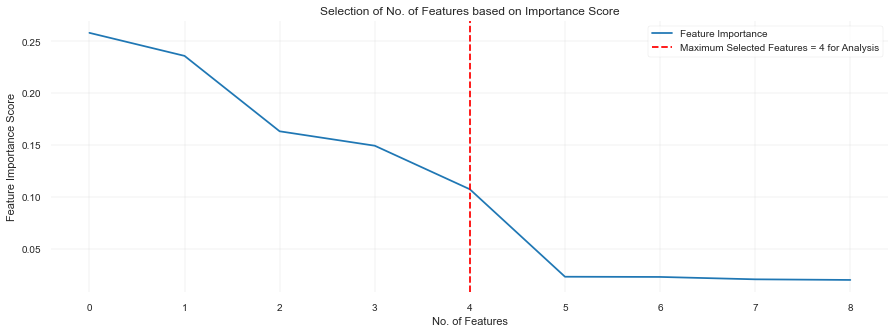

"\n# Predict Values using all the features, without reduction\nall_y_pred = rfc.predict(X_valid)\n\n# Build the k-fold cross-validator\nkfold = KFold(n_splits=5)\nall_y_pred = cross_val_predict(rfc, X_valid, y_valid, cv=kfold)\n\n\nresults = np.ndarray(shape=(1,11))\n\nCM_arr = metrics.confusion_matrix(y_valid, all_y_pred)\n\nTP = CM_arr[0][0]                                                                                          # True Positives\nFN = CM_arr[0][1]                                                                                          # False Positives\nFP = CM_arr[1][0]                                                                                          # True Negatives\nTN = CM_arr[1][1]                                                                                          # False Negatives\n\nresults[0][0] = metrics.accuracy_score(y_valid, all_y_pred) #Accuracy\nresults[0][1] = TP/(TP+FN)   #Sensitivity/Recall/True positive rate (TPR)\nresults[0][2] = TN/(FP

In [72]:
# Build the Random Forest Classifier model
#rfc = RandomForestClassifier()

rfc = best_grid

# Fit the model
rfc.fit(X_train, y_train)

sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

#selected_feat= X_train[(sel.get_support())]
#print(len(selected_feat))
#print(sel.get_support())
#print(np.count_nonzero(sel.get_support()))

# Save the Feature Importances sorted by their score
imp_score = np.array(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), df.columns.values), reverse=True))

#imp_features = 15
imp_features = int((np.count_nonzero(sel.get_support())))

fig = plt.figure(figsize=(15, 5))

plt.plot(list(imp_score[:,0]), label='Feature Importance')
plt.axvline(imp_features, color='r', linestyle='--', label='Maximum Selected Features = {} for Analysis'.format(imp_features))
plt.xlabel("No. of Features")
plt.ylabel("Feature Importance Score")
plt.title("Selection of No. of Features based on Importance Score")
plt.legend(loc='best')
plt.grid(True,linewidth=0.25)
#plt.xticks(range(0,X_train.shape[1],20))
#plt.gcf()
#plt.savefig('RFC Feature Selection Plot', bbox_to_anchor='tight')
plt.show()
#plt.close()

In [73]:
rfc.feature_importances_

array([0.2580961 , 0.23588632, 0.14927243, 0.16323295, 0.01987587,
       0.02054996, 0.02283873, 0.02296382, 0.10728383])

In [74]:
imp_score

array([[0.2581, 0.    ],
       [0.2359, 1.    ],
       [0.1632, 3.    ],
       [0.1493, 2.    ],
       [0.1073, 8.    ],
       [0.023 , 7.    ],
       [0.0228, 6.    ],
       [0.0205, 5.    ],
       [0.0199, 4.    ]])

In [77]:
# Predict Values using all the features, without reduction
all_y_pred = rfc.predict_proba(X_valid)
all_y_pred
dp = pd.DataFrame(all_y_pred)
dp.to_excel('rfc_temp.xlsx', index = False)

In [78]:
imp_df = df[(imp_score[0:imp_features,1]).astype(int)]

valid_df = dv
#Reduce Based on Selected number of features
#reduced_valid_df = valid_df[valid_df.columns[(imp_score[0:imp_features,1]).astype(int)]]
reduced_valid_df = valid_df[(imp_score[0:imp_features,1]).astype(int)]


red_X_train = imp_df.to_numpy()
red_X_valid = reduced_valid_df.to_numpy()


In [79]:
# Predict Values using all the features, without reduction
rfc = best_grid

# Fit the model
rfc.fit(red_X_train, y_train)

all_y_pred = rfc.predict_proba(red_X_valid)
all_y_pred
dp = pd.DataFrame(all_y_pred)
dp.to_excel('rfc_reduced_temp.xlsx', index = False)